In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data = pd.read_csv(r"C:\Users\anipi\Desktop\Summer Internship\Flight_Data (2).csv" , encoding = 'unicode_escape',low_memory=False )

In [3]:
data.head(4)

,Unnamed: 0,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date
0,0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953.0,01-01-2018
1,1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953.0,02-01-2018
2,2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956.0,03-01-2018
3,3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955.0,04-01-2018


In [4]:
data.tail(5)

,Unnamed: 0,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date
298691,298691,Vistara,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49,69265.0,2.17
298692,298692,Vistara,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49,77105.0,2.17
298693,298693,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49,79099.0,2.17
298694,298694,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10.00,49,81585.0,2.17
298695,298695,Vistara,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49,81585.0,2.17


In [5]:
#creating the copy of dataset
df = data.copy()

#### Data Profiling 
#### Data Cleaning 
#### Data Consistencey 
#### Data Formatting 
#### Outlier Detection 

In [6]:
df.shape

(298696, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298696 entries, 0 to 298695
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        298696 non-null  int64  
 1   airline           298696 non-null  object 
 2   source_city       298696 non-null  object 
 3   departure_time    298696 non-null  object 
 4   stops             298696 non-null  int64  
 5   arrival_time      298696 non-null  object 
 6   destination_city  298696 non-null  object 
 7   class             298696 non-null  object 
 8   duration          298696 non-null  float64
 9   days_left         298696 non-null  int64  
 10  price             298696 non-null  float64
 11  date              298696 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 27.3+ MB


In [8]:
# Null Values
null_values = df.isna().sum()
null_values

Unnamed: 0          0
airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
date                0
dtype: int64

In [9]:
# Null Values Percentage
null_values_percentage = (df.isna().sum()/df.shape[0])*100
null_values_percentage

Unnamed: 0          0.0
airline             0.0
source_city         0.0
departure_time      0.0
stops               0.0
arrival_time        0.0
destination_city    0.0
class               0.0
duration            0.0
days_left           0.0
price               0.0
date                0.0
dtype: float64

In [10]:
pd.concat([null_values, null_values_percentage],axis = 1)

,0,1
Unnamed: 0,0,0.0
airline,0,0.0
source_city,0,0.0
departure_time,0,0.0
stops,0,0.0
arrival_time,0,0.0
destination_city,0,0.0
class,0,0.0
duration,0,0.0
days_left,0,0.0


In [11]:
#All columns
all_columns = df.columns
all_columns

Index(['Unnamed: 0', 'airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price', 'date'],
      dtype='object')

In [12]:
#Numeric columns
numeric_columns = df.select_dtypes(include = object).columns
numeric_columns

Index(['airline', 'source_city', 'departure_time', 'arrival_time',
       'destination_city', 'class', 'date'],
      dtype='object')

In [13]:
#Non Numeric Columns
non_numeric_columns = df.select_dtypes(include = float).columns
non_numeric_columns

Index(['duration', 'price'], dtype='object')

In [14]:
# Duplicate Values
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
298691    False
298692    False
298693    False
298694    False
298695    False
Length: 298696, dtype: bool

In [15]:
#Filtering out duplicated Values
df = df[~df.duplicated()]
df[df.duplicated()]

,Unnamed: 0,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date


In [16]:
#Different Types of Airlines
df.airline.value_counts()

airline
Vistara      127757
Air_India     79537
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [17]:
#Source Cities
df.source_city.value_counts()

source_city
Delhi        61090
Mumbai       60672
Bangalore    51540
Kolkata      45752
Hyderabad    40621
Chennai      39021
Name: count, dtype: int64

In [18]:
df['class'].value_counts()

class
Economy     204816
Business     93880
Name: count, dtype: int64

In [19]:
df['stops'].value_counts()

stops
1    250290
0     36009
2     12397
Name: count, dtype: int64

In [20]:
df.departure_time.value_counts()

departure_time
Morning          70488
Early_Morning    66406
Evening          65093
Night            48218
Afternoon        47185
Late_Night        1306
Name: count, dtype: int64

In [21]:
df.arrival_time.value_counts()

arrival_time
Night            91028
Evening          77379
Morning          62847
Afternoon        37989
Early_Morning    15465
Late_Night       13988
Name: count, dtype: int64

In [22]:
df.arrival_time.value_counts()

arrival_time
Night            91028
Evening          77379
Morning          62847
Afternoon        37989
Early_Morning    15465
Late_Night       13988
Name: count, dtype: int64

### Data Profiling
1.**Unnamed : 0 & flight**
    - Drop this Columns.
    
2. **airline**
     -Replace the null values with mode.
   


6.  **Stops**
    -create a column and replace zero as '0'
   - one stops as '1'
     - two or more as '2'
         
6.   **class**
     - Create a extra column
    - Give Economy class as '0'.
    - Give Business class as '1'.
    - Replace the null valude using mode

7.. **Price**
      
      -change the datatype from object to float
      - Replace the null values with mode

      
8.   **Duration**
         
         -  Replace the null values with mode.
     
10.  **Date**
      -Replace the date where we have null values

In [23]:
# Drop the columns Unnamed:  0 & flight
df.drop(['Unnamed: 0', 'flight'] , axis =1, inplace = True)
df.head(2)

KeyError: "['flight'] not found in axis"

In [24]:
# Drop the columns Unnamed:  0 & flight
df.drop(['Unnamed: 0'] , axis =1, inplace = True)
df.head(2)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953.0,01-01-2018
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953.0,02-01-2018


#### Unnamed and Flight column are dropped and cleaned

### Airlines

In [25]:
#Replace the airline column which contain null values with mode.
mode_value = df['airline'].mode()[0]
df['airline'].fillna(mode_value, inplace=True)

In [26]:
null_count = df['airline'].isnull().sum()
null_count

0

### Stops

In [27]:
# changing stops column to o and 1's
df.stops = pd.factorize(df.stops)[0]


In [28]:
df['stops'].value_counts()

stops
1    250290
0     36009
2     12397
Name: count, dtype: int64

### Class

In [29]:
#replacing null values for class
mode_values = df['class'].mode()[0]
df['class'].fillna(mode_values,inplace = True)

In [30]:
null_count = df['class'].isnull().sum()
null_count

0

 ### Duration

In [31]:
#replacing null values in duration
mode_values = df['duration'].mode()[0]
df['duration'].fillna(mode_values , inplace = True)

In [32]:
null_count = df['duration'].isnull().sum()
null_count


0

In [33]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953.0,01-01-2018
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953.0,02-01-2018
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956.0,03-01-2018
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955.0,04-01-2018
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955.0,05-01-2018
...,...,...,...,...,...,...,...,...,...,...,...
298691,Vistara,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49,69265.0,2.17
298692,Vistara,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49,77105.0,2.17
298693,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49,79099.0,2.17
298694,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10.00,49,81585.0,2.17


### Price

In [34]:
#replace the null values with mode
mode_value = df['price'].mode()[0]
df['price'].fillna(mode_value, inplace=True)

In [35]:
null_count = df['price'].isnull().sum()
null_count

0

In [36]:
#changing the datatype
df['price'] = pd.to_numeric(df['price'], errors = 'coerce')

### Date

In [37]:
#replace the null values by using mode
mode_value = df['price'].mode([0])
df['date'].fillna(mode_values,inplace = True)

In [38]:
null_count = df['date'].isnull().sum()
null_count

0

In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298696 entries, 0 to 298695
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           298696 non-null  object 
 1   source_city       298696 non-null  object 
 2   departure_time    298696 non-null  object 
 3   stops             298696 non-null  int64  
 4   arrival_time      298696 non-null  object 
 5   destination_city  298696 non-null  object 
 6   class             298696 non-null  object 
 7   duration          298696 non-null  float64
 8   days_left         298696 non-null  int64  
 9   price             298696 non-null  float64
 10  date              298696 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 25.1+ MB


In [40]:
df.isna().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
date                0
dtype: int64

In [41]:
df.describe()

,stops,duration,days_left,price
count,298696.000000,298696.000000,298696.000000,298696.000000
mean,0.920950,12.059571,26.083607,20989.375331
std,0.394727,6.983519,13.550442,22719.503477
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.750000,15.000000,4769.000000
50%,1.000000,11.170000,26.000000,7425.000000
75%,1.000000,16.000000,38.000000,42546.000000
max,2.000000,29.830000,49.000000,98972.000000


Text(0.5, 1.0, "Box plots for 'duration'")

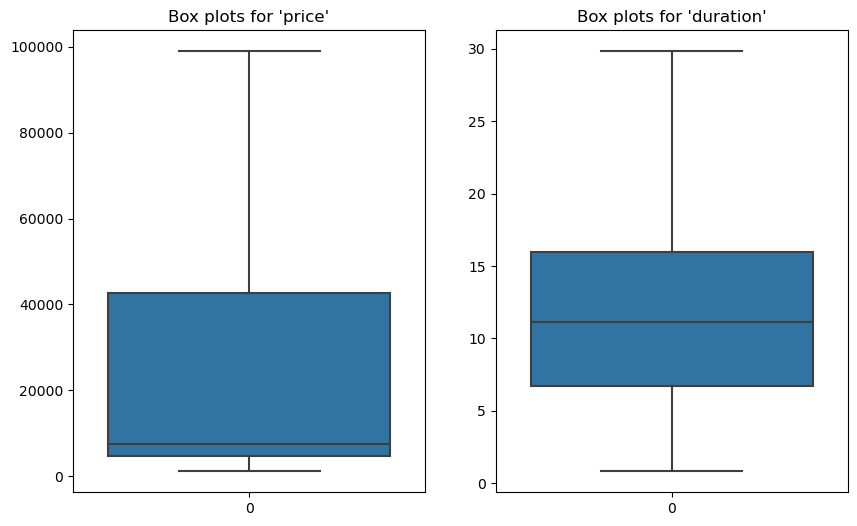

In [42]:
#Visulization for outliers
fig,ax = plt.subplots(1,2, figsize = (10,6))
sns.boxplot(data = df['price'], ax = ax[0])
ax[0].set_title("Box plots for 'price'")

sns.boxplot(data = df['duration'],ax = ax[1])
ax[1].set_title("Box plots for 'duration'")

### Price

In [43]:
#Quartile
Q1_price = np.quantile(df['price'],0.25)
Q3_price = np.quantile(df['price'],0.75)
IQR_price = Q3_price - Q1_price
#IQR_order
lower_limit_price = Q1_price - 1.5*IQR_price
upper_limit_price = Q3_price + 1.5*IQR_price

print(lower_limit_price)
print(upper_limit_price)

-51896.5
99211.5


In [44]:
# Removing the outliers
df = df[(df['price'] > lower_limit_price) & (df['price'] < upper_limit_price)]

### Duration

In [45]:
#Quartile
Q1_duration = np.quantile(df['duration'],0.25)
Q3_duration = np.quantile(df['duration'],0.75)
IQR_duration = Q3_duration - Q1_duration
#IQR_order
lower_limit_duration = Q1_duration - 1.5*IQR_duration
upper_limit_duration = Q3_duration + 1.5*IQR_duration

print(lower_limit_duration)
print(upper_limit_duration)

-7.125
29.875


In [46]:
# Removing the outliers
df = df[(df['duration'] > lower_limit_duration) & (df['duration'] < upper_limit_duration)]

In [47]:
df.describe()

,stops,duration,days_left,price
count,298696.000000,298696.000000,298696.000000,298696.000000
mean,0.920950,12.059571,26.083607,20989.375331
std,0.394727,6.983519,13.550442,22719.503477
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.750000,15.000000,4769.000000
50%,1.000000,11.170000,26.000000,7425.000000
75%,1.000000,16.000000,38.000000,42546.000000
max,2.000000,29.830000,49.000000,98972.000000


In [48]:
#saving the cleaned data
df.to_csv(r"C:\Users\anipi\Desktop\Summer Internship\Flight_Data (2).csv")

### Explorartory Amalysis

#### Statistical analysis

In [49]:
df.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953.0,01-01-2018
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953.0,02-01-2018
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956.0,03-01-2018


In [50]:
df.describe()

,stops,duration,days_left,price
count,298696.000000,298696.000000,298696.000000,298696.000000
mean,0.920950,12.059571,26.083607,20989.375331
std,0.394727,6.983519,13.550442,22719.503477
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.750000,15.000000,4769.000000
50%,1.000000,11.170000,26.000000,7425.000000
75%,1.000000,16.000000,38.000000,42546.000000
max,2.000000,29.830000,49.000000,98972.000000
